# BACKGROUND AND CONTEXT

Introduction: The smartphone industry has experienced remarkable growth over the past decade, with billions of smartphones being sold worldwide each year. As the market continues to expand, both consumers and manufacturers are faced with the challenge of accurately predicting smartphone prices. Price prediction plays a crucial role in various aspects of the industry, including product positioning, marketing strategies, and customer purchasing decisions. In response to this demand, a smartphone price prediction project aims to leverage advanced data analysis and machine learning techniques to forecast smartphone prices with greater accuracy and efficiency.

# Objective

The objective of the smartphone price prediction project is to develop a predictive model that accurately forecasts smartphone prices based on various factors, benefiting manufacturers, retailers, and consumers by optimizing pricing strategies, enabling informed purchasing decisions, and enhancing market transparency.

# Loading the libraries

In [54]:

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the Limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)

# pd.set_option('display.max_rows", None)
pd.set_option("display.max_rows", 200)

# To build Linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Loading and Exploring The Data

In [55]:
data = pd.read_csv('smartphones - smartphones.csv')
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns. ')

data.head(n=10)

There are 1020 rows and 11 columns. 


,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,Apple iPhone 14,"₹65,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,Xiaomi Redmi Note 12 Pro Plus,"₹29,999",86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,Nothing Phone 1,"₹26,749",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,OnePlus Nord 2T 5G,"₹28,999",84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


Only one column is of the type float. For better results we will covert the rest of the columns to suitable data types.

In [57]:
print(f'LOADING HELPER FUNCTIONS...')

# Extract ROM
def rom(s):
    pattern = r"\d+\D+(\d+)"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group(1)   # extract the captured second sequence of digits as a string
        return int(number)
    
# Extract RAM   
def ram(s):
    pattern = r"\d+"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group()   # extract the captured second sequence of digits as a string
        return int(number) 

# Extract battery power
def battery(s):
    pattern = r"\d+\D+(\d+)"
    match = re.search(pattern, s)  # find a sequence of digits followed by a non-digit and capture the second sequence of digits
    if match:
        number = match.group(1)   # extract the captured second sequence of digits as a string
        return int(number)  

# Extract screen size
def screen_size(s):
    pattern = r"(\d+\.\d+) inches"
    match = re.search(pattern, s)
    if match:
        screen_size = float(match.group(1))
        return int(screen_size)

# Extract screen resolution width 
def width(s):
    pattern = r"(\d+) x (\d+) px"
    match = re.search(pattern, s)
    if match:
        width = int(match.group(1))
        return width

# Extract screen resolution height    
def height(s):
    pattern = r"(\d+) x (\d+) px"
    match = re.search(pattern, s)
    if match:
        height = int(match.group(2))
        return height

# Extract Frequency
def frequency(s):
    pattern = r"\b\d+\b(?=\s*Hz)"
    match = re.search(pattern, s)  # find a sequence of digits before the string " Hz"
    if match:
        number = match.group()  # extract the matched sequence of digits as a string
        return int(number)  

# Exercise
def android_version(s):
    pass
# complete this function and add android version column

print(f'HELPER FUNCTION LOADED!')

LOADING HELPER FUNCTIONS...
HELPER FUNCTION LOADED!


Creating a new data frame

In [58]:
print(f'Creating a New Dataframe')
df = pd.DataFrame()
df['company'] = data['model'].apply(lambda x:x.split()[0])
df['price'] = data['price'].apply(lambda x: int(''.join(x[1:].split(','))))
df['rating'] = data['rating']
df['processor'] = data['processor'].apply(lambda x:x.split()[0])
df['ram'] = data['ram'].apply(ram)
df['battery'] = data['battery'].apply(battery)
df['screen_size'] = data['display'].apply(screen_size)
df['width'] = data['display'].apply(width)
df['height'] = data['display'].apply(height)
df['refresh rate'] = data['display'].apply(frequency)
df['rom'] = data['ram'].apply(rom)

# df['android_version']                     ----------------------------exercise-------------------------------------------

print(f'Data Preprocessed and new dataframe is created!')
print(f'Displaying Newly Created Dataframe!')

df.head()

Creating a New Dataframe
Data Preprocessed and new dataframe is created!
Displaying Newly Created Dataframe!


,company,price,rating,processor,ram,battery,screen_size,width,height,refresh rate,rom
0,OnePlus,54999,89.0,Snapdragon,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,19989,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,16499,75.0,Exynos,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,14999,81.0,Snapdragon,6.0,NaN,6.0,1080.0,2400.0,120.0,128.0
4,Realme,24999,82.0,Dimensity,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       1020 non-null   object 
 1   price         1020 non-null   int64  
 2   rating        879 non-null    float64
 3   processor     1020 non-null   object 
 4   ram           1019 non-null   float64
 5   battery       801 non-null    float64
 6   screen_size   967 non-null    float64
 7   width         987 non-null    float64
 8   height        987 non-null    float64
 9   refresh rate  611 non-null    float64
 10  rom           997 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 87.8+ KB


Now we have just 2 categorical columns and the rest are numerical columns.

In [60]:
df.describe()

,price,rating,ram,battery,screen_size,width,height,refresh rate,rom
count,1020.000000,879.000000,1019.000000,801.000000,967.000000,987.000000,987.000000,611.000000,997.000000
mean,31371.767647,78.258248,22.645731,46.329588,5.921406,1060.914894,2179.227964,111.638298,134.635908
std,39168.942590,7.402854,132.347036,42.285177,0.632150,309.291602,572.898548,18.530837,88.907531
min,99.000000,60.000000,1.000000,1.000000,1.000000,120.000000,160.000000,90.000000,1.000000
25%,12464.250000,74.000000,4.000000,18.000000,6.000000,1080.000000,1612.000000,90.000000,64.000000
50%,19815.000000,80.000000,6.000000,33.000000,6.000000,1080.000000,2400.000000,120.000000,128.000000
75%,34999.000000,84.000000,8.000000,66.000000,6.000000,1080.000000,2408.000000,120.000000,128.000000
max,650000.000000,89.000000,1800.000000,720.000000,8.000000,2460.000000,3840.000000,240.000000,640.000000


In [61]:
null_values = df.isnull()

# Count the number of null values in each column
null_count = null_values.sum()

# Display the columns with null values
columns_with_null = null_count[null_count > 0]
print("Columns with null values:")
print(columns_with_null)

# Display the rows with null values
rows_with_null = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_null)

Columns with null values:
rating          141
ram               1
battery         219
screen_size      53
width            33
height           33
refresh rate    409
rom              23
dtype: int64
Rows with null values:
       company   price  rating   processor   ram  battery  screen_size  \
3     Motorola   14999    81.0  Snapdragon   6.0      NaN          6.0   
6        Apple   65999    81.0      Bionic   6.0      NaN          6.0   
14     Samsung  114990     NaN  Snapdragon   8.0     45.0          6.0   
15       Apple   62999    79.0      Bionic   4.0      NaN          6.0   
16        Vivo    9999    65.0       Helio   3.0     10.0          6.0   
...        ...     ...     ...         ...   ...      ...          ...   
1012      itel    4787     NaN  Spreadtrum   2.0      NaN          NaN   
1014      Vivo  119990     NaN  Snapdragon  12.0     66.0          8.0   
1016     Honor   14990    75.0  Snapdragon   6.0     22.0          6.0   
1018  Motorola   19990    80.0  Snapdr

In [62]:
#Imputing the missing values by taking the median

for i in df.columns:
    if df[i].dtype != "object":
        median = df[i].median()
        df[i] = df[i].fillna(median)

In [63]:
null_values = df.isnull()

# Count the number of null values in each column
null_count = null_values.sum()

# Display the columns with null values
columns_with_null = null_count[null_count > 0]
print("Columns with null values:")
print(columns_with_null)

# Display the rows with null values
rows_with_null = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_null)

Columns with null values:
Series([], dtype: int64)
Rows with null values:
Empty DataFrame
Columns: [company, price, rating, processor, ram, battery, screen_size, width, height, refresh rate, rom]
Index: []


In [64]:
df.head()

,company,price,rating,processor,ram,battery,screen_size,width,height,refresh rate,rom
0,OnePlus,54999,89.0,Snapdragon,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,19989,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,16499,75.0,Exynos,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,14999,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2400.0,120.0,128.0
4,Realme,24999,82.0,Dimensity,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0


In [65]:
Company = df['company'].value_counts()
fig = px.bar(y=Company.values, 
             x=Company.index, 
             color = Company.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Company.values,
             title= 'Company distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

Market leaders are Xiaomi and Samsung, followed by Vivo and Realme

In [66]:
Processor = df['processor'].value_counts()
fig = px.bar(y=Processor.values, 
             x=Processor.index, 
             color = Processor.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Processor.values,
             title= 'Processor distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Processor",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

Most popular processor is Snapdragon

In [67]:
Rating = df['rating'].value_counts()
fig = px.bar(y=Rating.values, 
             x=Rating.index, 
             color = Rating.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Rating.values,
             title= 'Rating distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

#### Ratings are skewed to the left

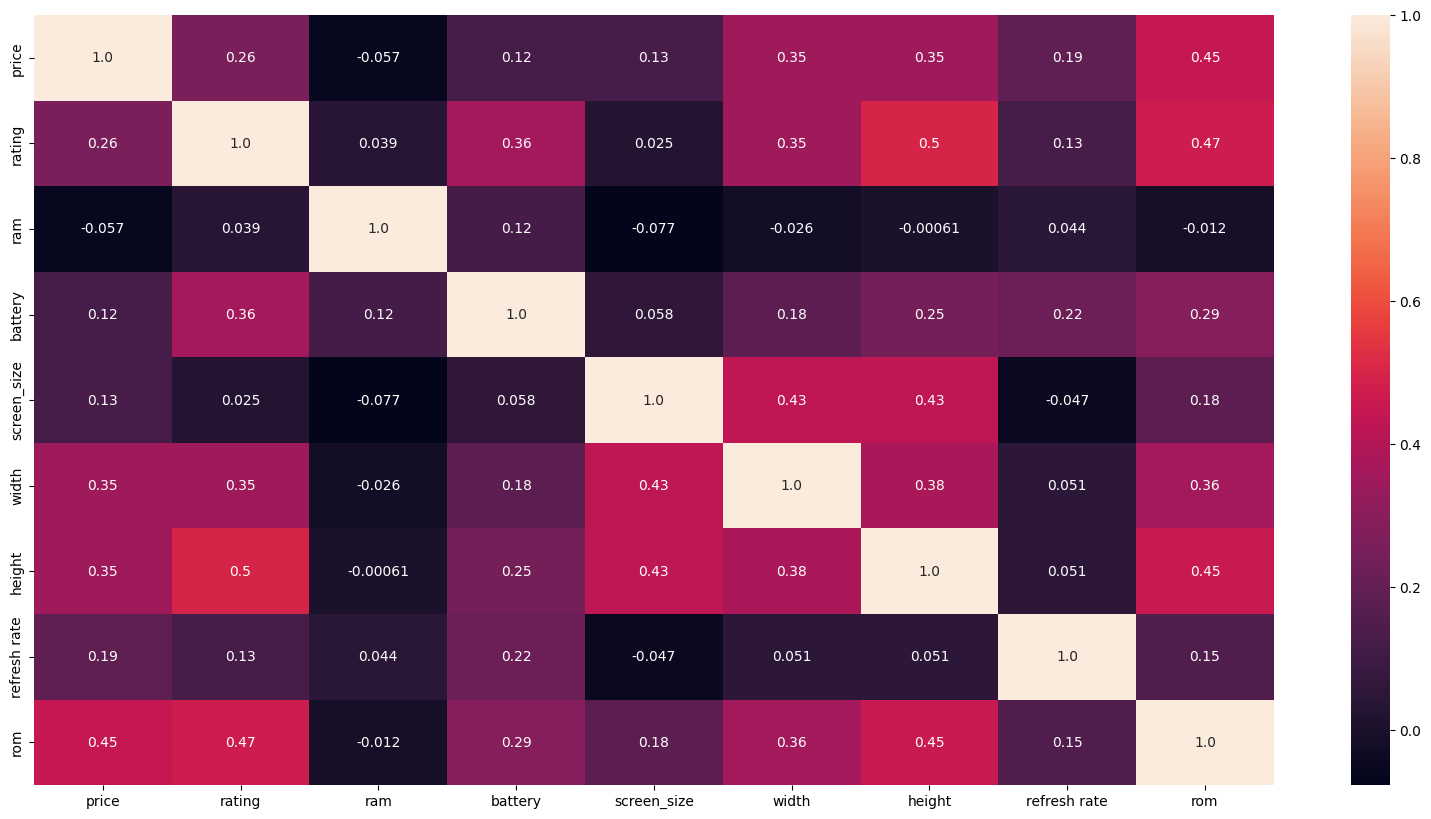

In [68]:
plt.figure(figsize=(20,10))
dnew = df.select_dtypes(exclude=['object'])

sns.heatmap(dnew.corr(),annot = True, fmt = '.2')
plt.show()

#### Higher correlation between the dependent variable Price and ROM 

# Removing Outliers

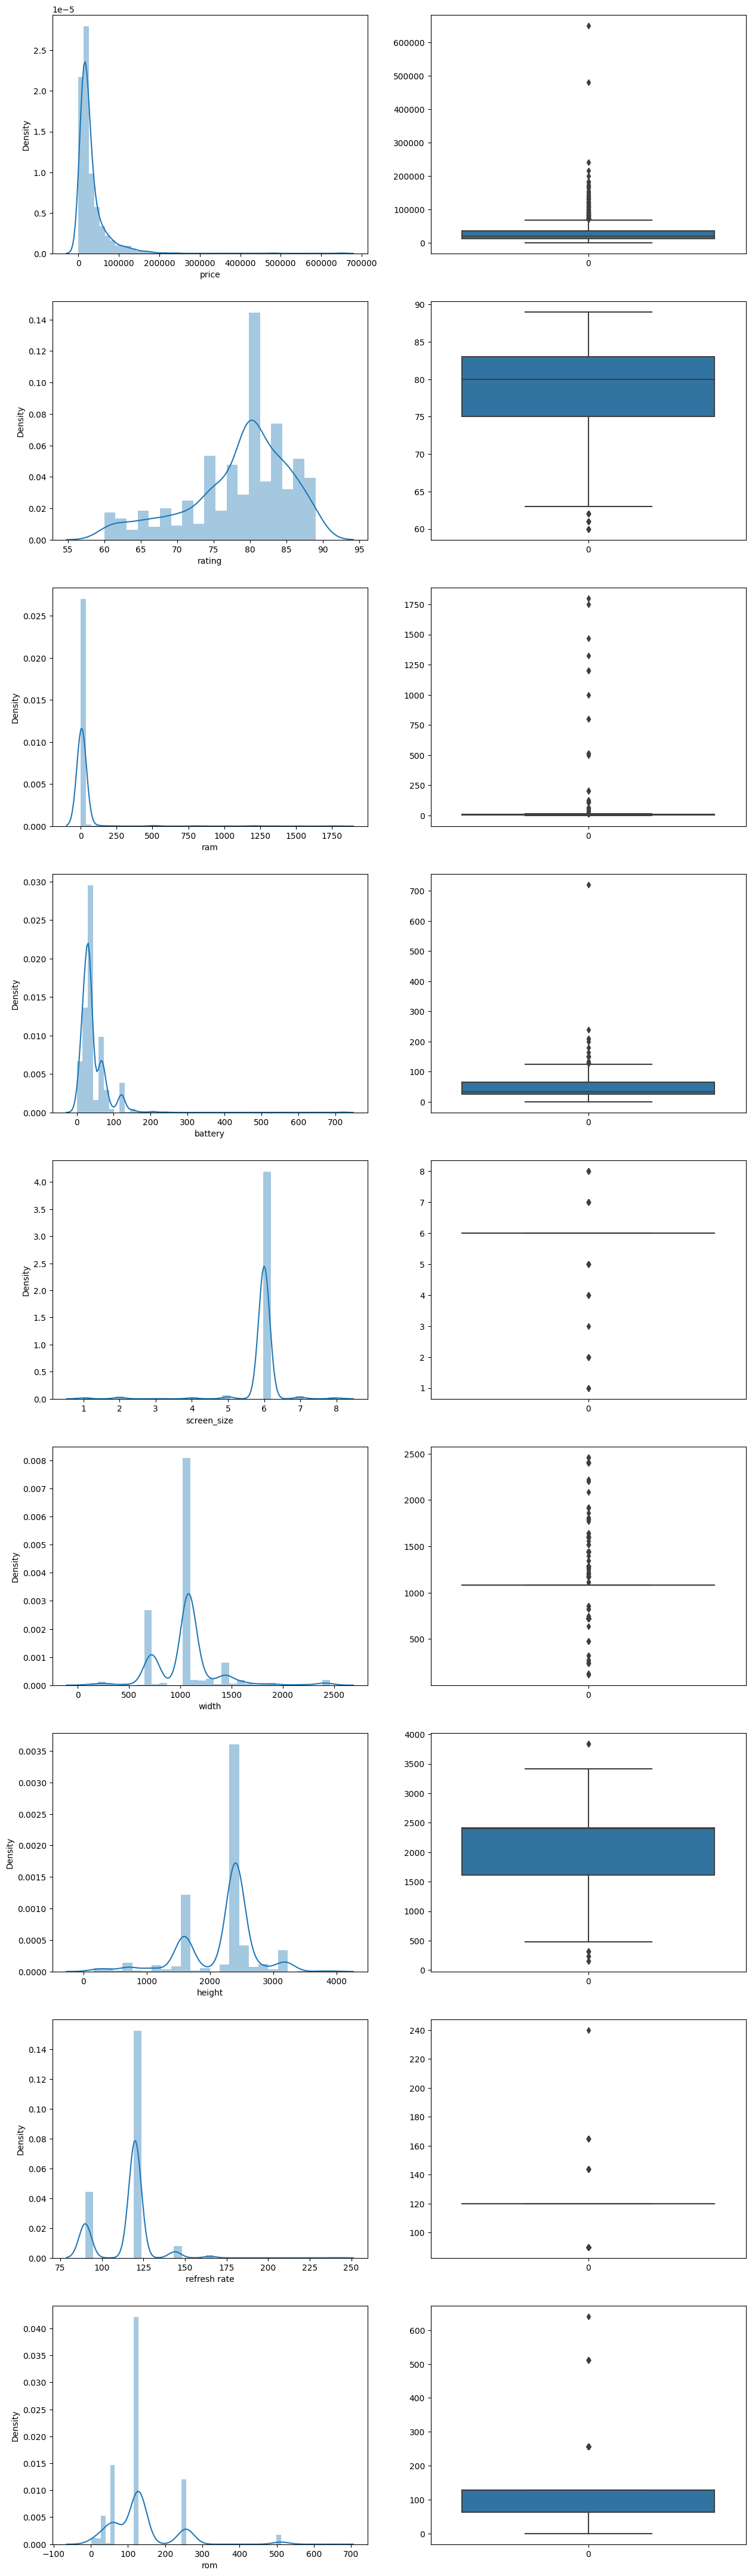

In [69]:
a=1
plt.figure(figsize=(15, 80))
for i in df[
    [
    'price',
    'rating',
    'ram',
    'battery',
    'screen_size',
    'width',
    'height',
    'refresh rate',
    'rom',
    ]
]:

    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt. title( Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2


Price and Battery outliers need to be removed

In [70]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = np.quantile(col,[0.25,0.75])
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll,ul
    

In [71]:
for i in df[
    [
    'price',
    'battery',
    'rating',
    ]
]:
    if df[i].dtype!= "object":
        ll,ul = remove_outlier(df[i])
        df[i] = np.where(df[i]>ul,ul,df[i])
        df[i] = np.where(df[i]<ll,ll,df[i])

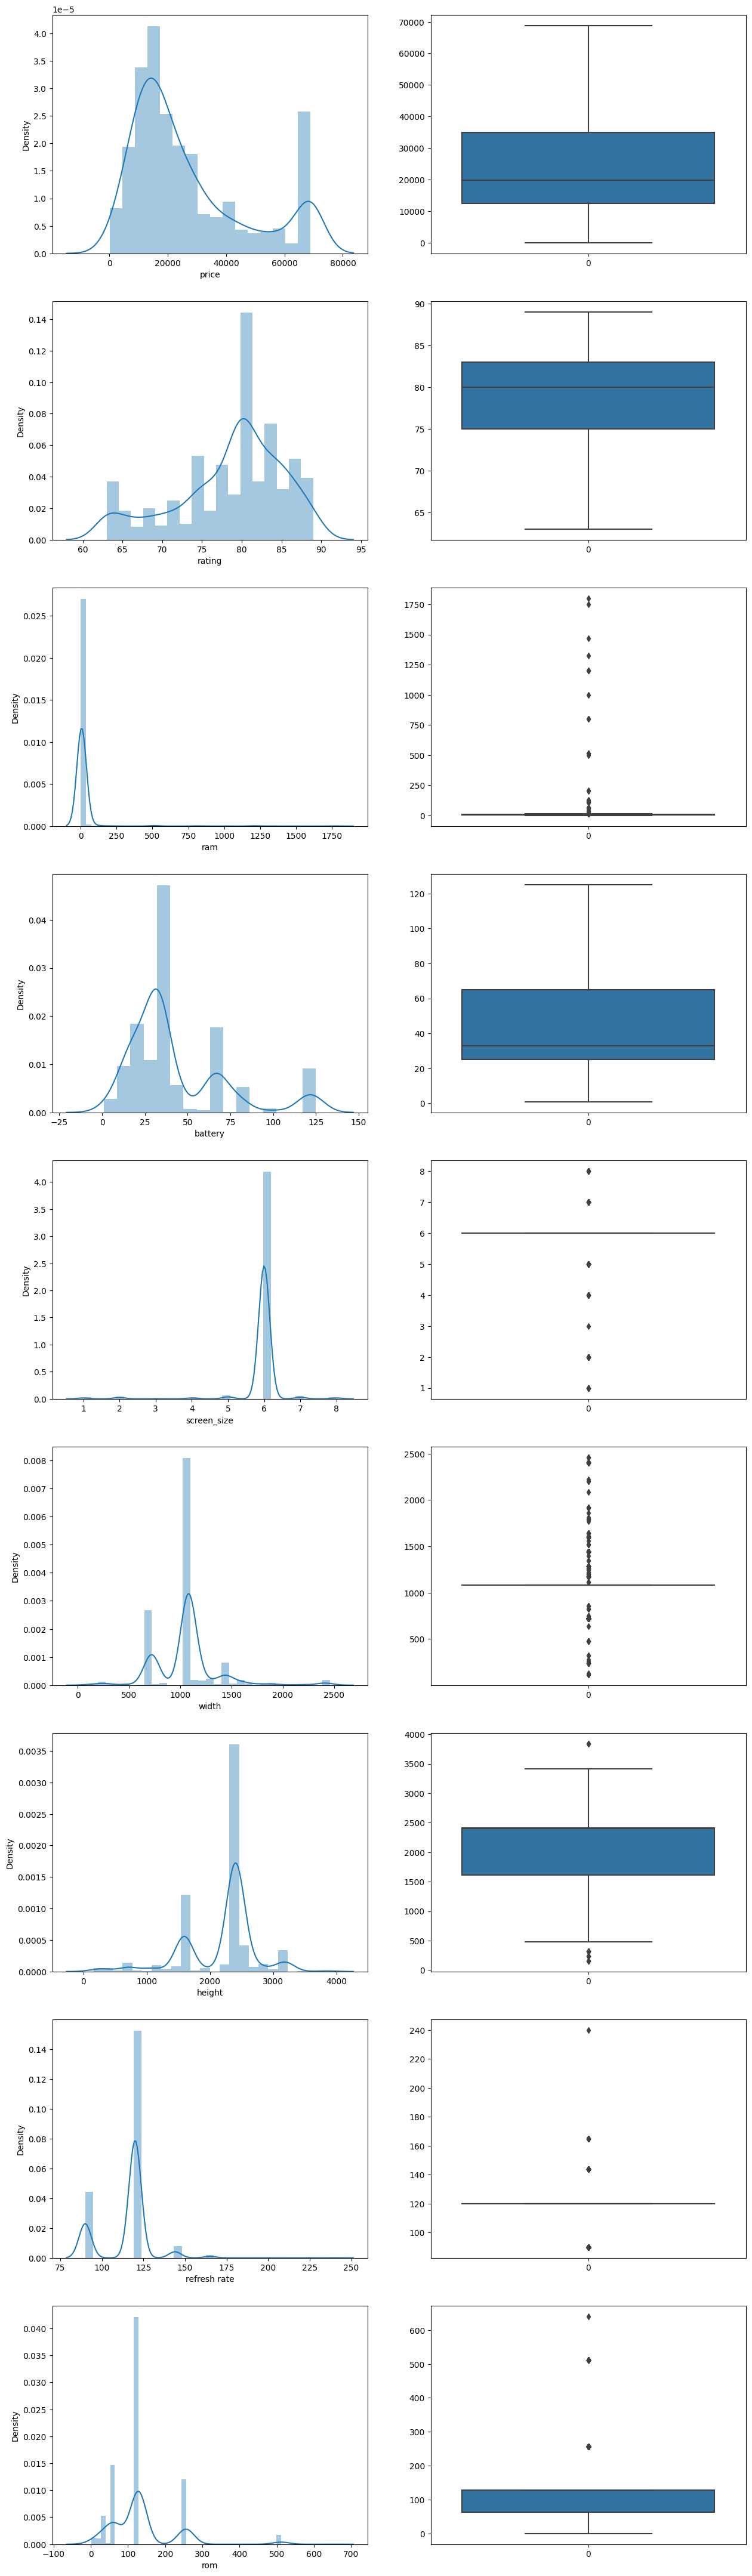

In [72]:
a=1
plt.figure(figsize=(15, 80))
for i in df[
    [
    'price',
    'rating',
    'ram',
    'battery',
    'screen_size',
    'width',
    'height',
    'refresh rate',
    'rom',
    ]
]:

    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt. title( Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2

# Data Preparation


In [73]:
X = df.drop("price",axis = 1)
y = df[['price']]

X.head()

,company,rating,processor,ram,battery,screen_size,width,height,refresh rate,rom
0,OnePlus,89.0,Snapdragon,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0
1,OnePlus,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0
2,Samsung,75.0,Exynos,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0
3,Motorola,81.0,Snapdragon,6.0,33.0,6.0,1080.0,2400.0,120.0,128.0
4,Realme,82.0,Dimensity,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0


In [74]:
X = pd.get_dummies(X,columns=['company','processor'],drop_first = True)
X.head()

,rating,ram,battery,screen_size,width,height,refresh rate,rom,company_Asus,company_BLU,company_BlackZone,company_Blackview,company_CAT,company_Cola,company_DIZO,company_Doogee,company_Duoqin,company_Eunity,company_Gionee,company_Google,company_Honor,company_Huawei,company_Infinix,company_Itel,company_Jio,company_Karbonn,company_LG,company_Lava,company_LeEco,company_Leitz,company_Lenovo,company_Letv,company_Lyf,company_Micromax,company_Motorola,company_Namotel,company_Nokia,company_Nothing,company_Nubia,company_OPPO,company_OnePlus,company_Oppo,company_Oukitel,company_POCO,company_Poco,company_Realme,company_Redmi,company_Royole,company_Samsung,company_Sharp,company_Sony,company_TCL,company_Tecno,company_Tesla,company_Vertu,company_Vivo,company_XTouch,company_Xiaomi,company_ZTE,company_Zanco,company_iKall,company_iQOO,company_itel,processor_1,processor_1.77,processor_1450,processor_2000,processor_256,processor_32,processor_4,processor_48,processor_52,processor_8,processor_800,processor_A13,processor_Apple,processor_Bionic,processor_Dimensity,processor_Dual,processor_Exynos,processor_Fusion,processor_Google,processor_Helio,"processor_Helio,",processor_Kirin,processor_No,processor_Octa,processor_Quad,processor_Qualcomm,"processor_SC6531E,","processor_SC9863A,",processor_Samsung,processor_Sanpdragon,processor_Single,processor_Snapdragon,processor_Spreadtrum,processor_Tiger,processor_Unisoc,"processor_Unisoc,"
0,89.0,12.0,100.0,6.0,1440.0,3216.0,120.0,256.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,81.0,6.0,33.0,6.0,1080.0,2412.0,120.0,128.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,75.0,4.0,15.0,6.0,1080.0,2408.0,90.0,64.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,81.0,6.0,33.0,6.0,1080.0,2400.0,120.0,128.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,82.0,6.0,67.0,6.0,1080.0,2412.0,120.0,128.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [75]:
#splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3, random_state = 42
)

# Choose Model, Train and Evaluate

# Linear Regression

In [76]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [77]:
#coefficients for each of the indpendent attributes

for idx, col_name in enumerate(X_train.columns):
    print(
        'The coefficient for {} is {}'.format(col_name,linearregression.coef_[0][idx])
    )

The coefficient for rating is 328.1514144112877
The coefficient for ram is -1.7088093416904648
The coefficient for battery is 137.40020432459696
The coefficient for screen_size is 1038.9782768748923
The coefficient for width is 9.25058857364878
The coefficient for height is 5.983783004672894
The coefficient for refresh rate is 113.36136235309073
The coefficient for rom is 56.44104123224872
The coefficient for company_Asus is 12368.091223742955
The coefficient for company_BLU is -17782.863166221738
The coefficient for company_BlackZone is 3915.500837663747
The coefficient for company_Blackview is -4.6516106522176415e-09
The coefficient for company_CAT is -1.1568772606551647e-09
The coefficient for company_Cola is -6253.435508630371
The coefficient for company_DIZO is 5826.345463935702
The coefficient for company_Doogee is -5423.466839062316
The coefficient for company_Duoqin is -828.3435359368412
The coefficient for company_Eunity is 6102.856021519359
The coefficient for company_Gionee 

This model suggests the brand and processor affect the phone price the most.

In [78]:
print('The intercept for our model is {}'.format(linearregression.intercept_[0]))

The intercept for our model is -62257.7140992833


In [79]:
pred_train = linearregression.predict(X_train)
pred_test = linearregression.predict(X_test)

In [80]:
#R Squared Value:
lrscore_train = linearregression.score(X_train,y_train)
lrscore_test = linearregression.score(X_test,y_test)
print(lrscore_train)
print(lrscore_test)

0.7937937954104113
0.7425005729517467


Values near 75% indicate this is a decent model, with the difference between the test and train set value lesser than 10%.

In [81]:
#RMSE
rmse_lr_train = mean_squared_error(y_train,pred_train,squared = False)
rmse_lr_test = mean_squared_error(y_test,pred_test,squared = False)
print(rmse_lr_train)
print(rmse_lr_test)

8856.610988829176
10143.288876357623


RMSE value is very high, indicating inaccuracy.

##### Now performing some diagnostic analysis

In [82]:
data = y_test.copy()
data['pred'] = pred_test
data['residual'] = data['price'] - data['pred']
data.head()

,price,pred,residual
523,24494.0,28006.910323,-3512.910323
602,24999.0,22385.073683,2613.926317
526,49959.0,38627.471813,11331.528187
31,20999.0,25861.815162,-4862.815162
616,19990.0,28074.428335,-8084.428335


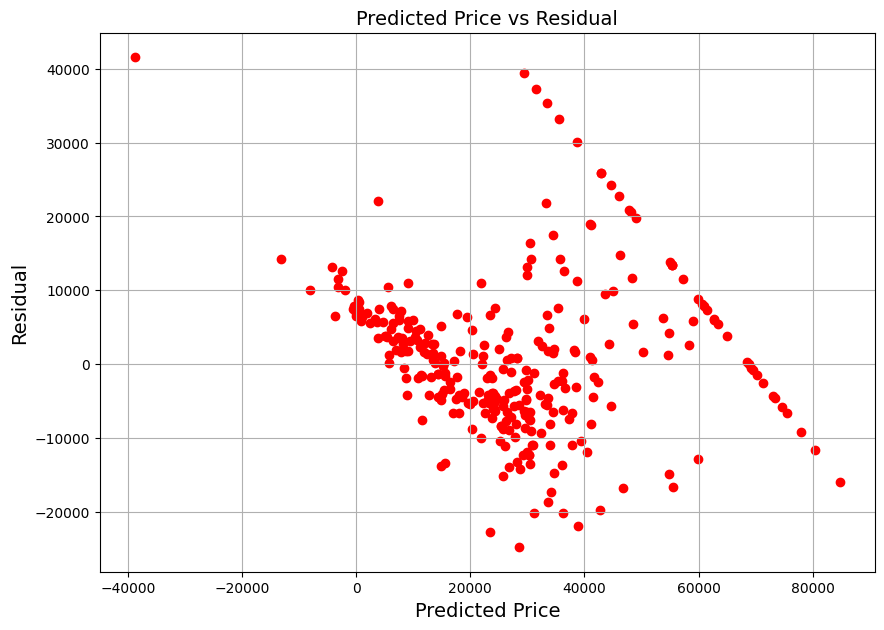

In [83]:
plt.figure(figsize=(10,7))
plt.scatter(data['pred'],data['residual'],color='red')
plt.title('Predicted Price vs Residual', fontsize = 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize = 14)
plt.grid(True)
plt.show()

#### This model is clearly not a good fit, with negative values being predicted. This could be due to the dependent variable being skewed.

<Axes: xlabel='residual', ylabel='Density'>

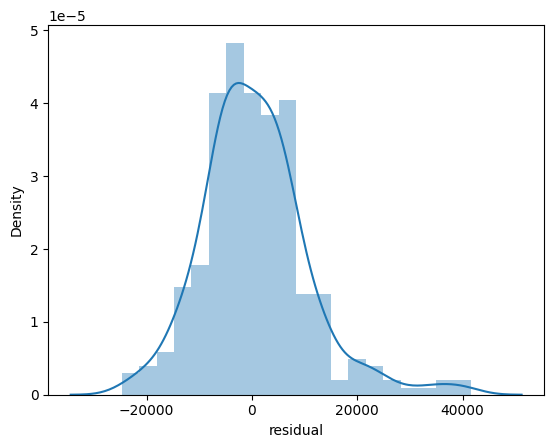

In [84]:
sns.distplot(data.residual)

A little similar to normal distiribution

#### Being the oldest model, linear regression is not the best model due to the complexities in today's data.

# Random Forest Regressor

In [85]:
rfregressor = RandomForestRegressor(max_depth = 20, min_samples_split = 30, criterion = 'friedman_mse')
rfregressor.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_split=30)

In [86]:
pred_train = rfregressor.predict(X_train)
pred_test = rfregressor.predict(X_test)

In [87]:
#R Squared Value:
rfscore_train = rfregressor.score(X_train,y_train)
rfscore_test = rfregressor.score(X_test,y_test)
print(rfscore_train)
print(rfscore_test)

0.8887887125208057
0.8515998078877932


In [88]:
#RMSE
rmse_rf_train = mean_squared_error(y_train,pred_train,squared = False)
rmse_rf_test = mean_squared_error(y_test,pred_test,squared = False)
print(rmse_rf_train)
print(rmse_rf_test)

6504.158849376948
7700.304376364609


In [89]:
data = y_test.copy()
data['pred'] = pred_test
data['residual'] = data['price'] - data['pred']
data.head()

,price,pred,residual
523,24494.0,30392.342642,-5898.342642
602,24999.0,21320.836192,3678.163808
526,49959.0,56354.578906,-6395.578906
31,20999.0,21611.358372,-612.358372
616,19990.0,26511.178190,-6521.178190


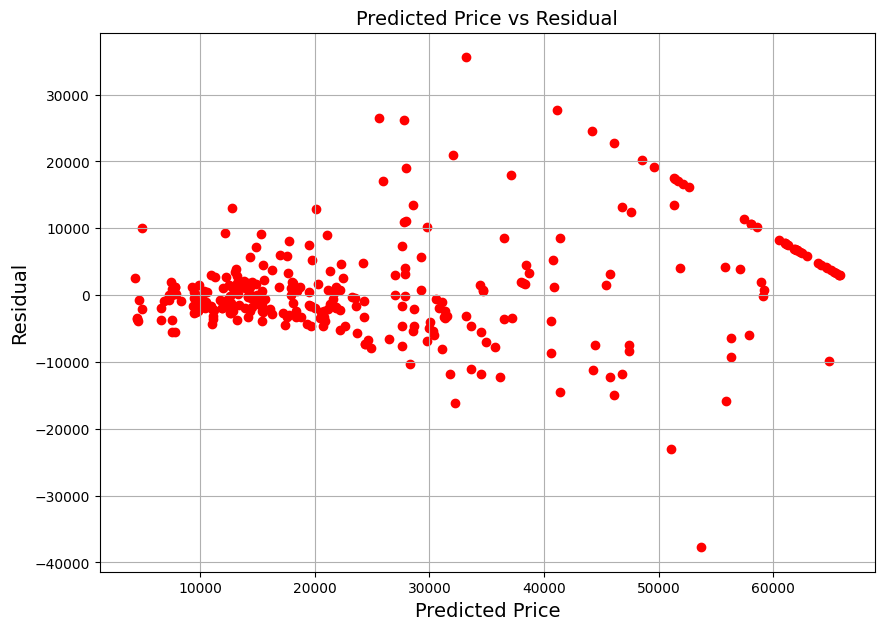

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(data['pred'],data['residual'],color='red')
plt.title('Predicted Price vs Residual', fontsize = 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize = 14)
plt.grid(True)
plt.show()

Results are much better for lower end smartphones.

In [91]:
pd.DataFrame(rfregressor.feature_importances_,index = X_test.columns).sort_values(
    0,ascending = False
)

,0
height,4.451025e-01
rating,1.738249e-01
rom,1.269300e-01
ram,4.867733e-02
width,4.260200e-02
processor_Bionic,3.367894e-02
battery,2.958750e-02
screen_size,2.029455e-02
refresh rate,1.100746e-02
company_LG,8.651063e-03


Indicates the height or size of the phone to be of the most importance.


#### We can say that the Random Forest Regressor model is a better fit.

# Adaboost Regressor

In [92]:
adaboost = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(
        max_depth = 10, min_samples_split = 25, random_state = 42
    ),
    random_state = 42,
)
adaboost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       min_samples_split=25,
                                                       random_state=42),
                  random_state=42)

In [93]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

In [94]:
#R Squared Value:
adascore_train = adaboost.score(X_train,y_train)
adascore_test = adaboost.score(X_test,y_test)
print(adascore_train)
print(adascore_test)

0.9345559382716397
0.8628254963171413


In [95]:
#RMSE
rmse_ada_train = mean_squared_error(y_train,pred_train,squared = False)
rmse_ada_test = mean_squared_error(y_test,pred_test,squared = False)
print(rmse_ada_train)
print(rmse_ada_test)

4989.440269689693
7403.33428093985


In [96]:
data = y_test.copy()
data['pred'] = pred_test
data['residual'] = data['price'] - data['pred']
data.head()

,price,pred,residual
523,24494.0,28309.851485,-3815.851485
602,24999.0,23261.291667,1737.708333
526,49959.0,58000.517857,-8041.517857
31,20999.0,24233.423077,-3234.423077
616,19990.0,26118.400000,-6128.400000


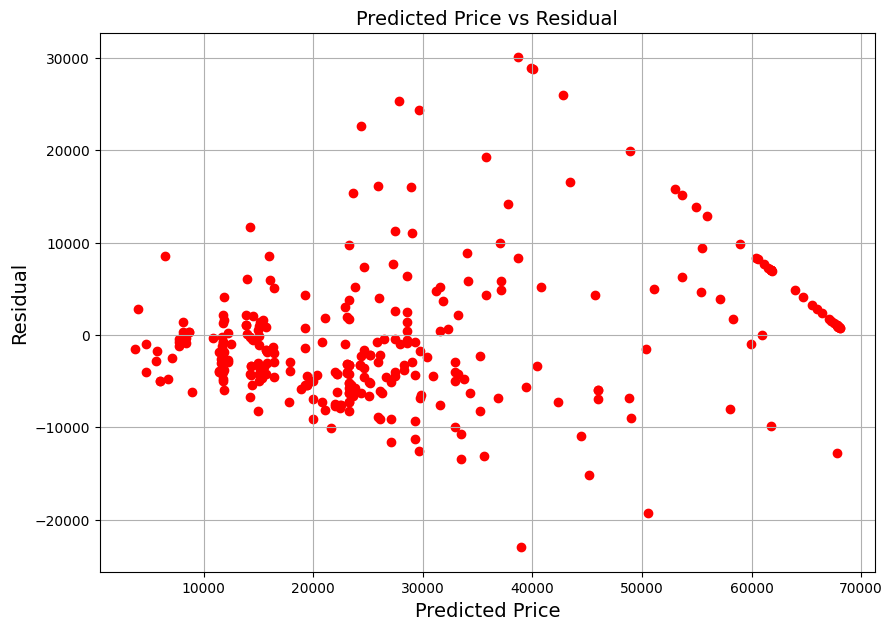

In [97]:
plt.figure(figsize=(10,7))
plt.scatter(data['pred'],data['residual'],color='red')
plt.title('Predicted Price vs Residual', fontsize = 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize = 14)
plt.grid(True)
plt.show()

# XGB Regressor

In [98]:
xgbregressor = XGBRegressor(max_depth = 10, learning_rate = 0.05, reg_alpha = 1, random_state = 42)
xgbregressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [99]:
pred_train = xgbregressor.predict(X_train)
pred_test = xgbregressor.predict(X_test)

In [100]:
#R Squared Value:
xgbscore_train = xgbregressor.score(X_train,y_train)
xgbscore_test = xgbregressor.score(X_test,y_test)
print(xgbscore_train)
print(xgbscore_test)

0.982929783805738
0.8490658176306083


In [101]:
#RMSE
rmse_xgb_train = mean_squared_error(y_train,pred_train,squared = False)
rmse_xgb_test = mean_squared_error(y_test,pred_test,squared = False)
print(rmse_xgb_train)
print(rmse_xgb_test)

2548.21586838926
7765.768928005183


In [102]:
data = y_test.copy()
data['pred'] = pred_test
data['residual'] = data['price'] - data['pred']
data.head()

,price,pred,residual
523,24494.0,28009.197266,-3515.197266
602,24999.0,22210.285156,2788.714844
526,49959.0,57568.781250,-7609.781250
31,20999.0,17261.498047,3737.501953
616,19990.0,23812.900391,-3822.900391


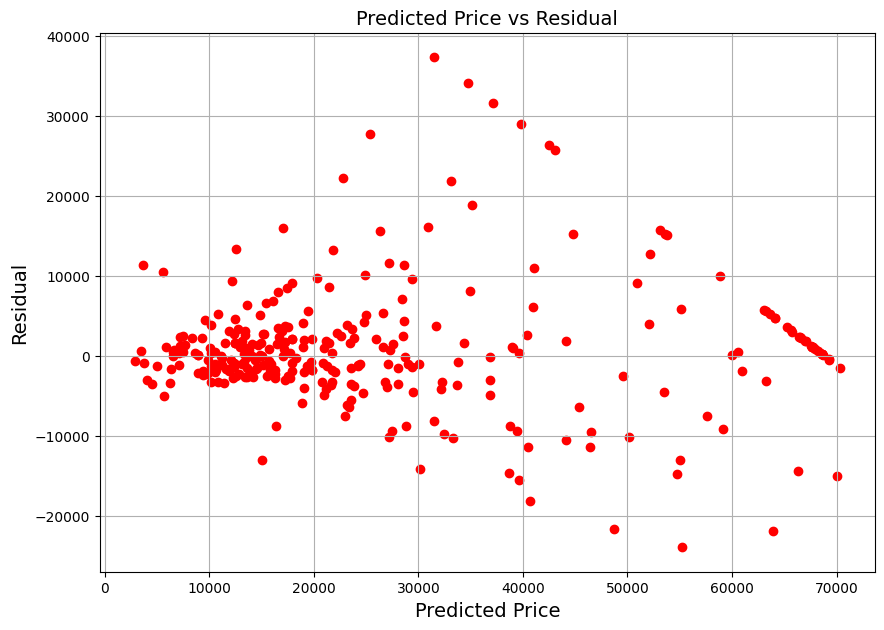

In [103]:
plt.figure(figsize=(10,7))
plt.scatter(data['pred'],data['residual'],color='red')
plt.title('Predicted Price vs Residual', fontsize = 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize = 14)
plt.grid(True)
plt.show()

# Comparision and Conclusion

In [104]:
train_score = []
train_score.extend(
    [
        lrscore_train,
        rfscore_train,
        adascore_train,
        xgbscore_train,
    ]
)

test_score = []
test_score.extend(
    [
        lrscore_test,
        rfscore_test,
        adascore_test,
        xgbscore_test,
    ]
)

rmse_train = []
rmse_train.extend(
    [
        rmse_lr_train,
        rmse_rf_train,
        rmse_ada_train,
        rmse_xgb_train,
    ]
)

rmse_test = []
rmse_test.extend(
    [
        rmse_lr_test,
        rmse_rf_test,
        rmse_ada_test,
        rmse_xgb_test,
    ]
)

In [106]:
comparison_frame = pd.DataFrame(
    {
        'Model': [
            'Linear Regression',
            'Random Forest',
            'Ada Boost',
            'XGBoost',
        ],
        'Train Score': train_score,
        'Test Score': test_score,
        'Train_RMSE': rmse_train,
        'Test_RMSE': rmse_test,
    }
)

comparison_frame['Diff_in_Score'] = np.abs(
    comparison_frame['Train Score'] - comparison_frame['Test Score']
)

#sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Diff_in_Score',ascending = True)

,Model,Train Score,Test Score,Train_RMSE,Test_RMSE,Diff_in_Score
1,Random Forest,0.888789,0.851600,6504.158849,7700.304376,0.037189
0,Linear Regression,0.793794,0.742501,8856.610989,10143.288876,0.051293
2,Ada Boost,0.934556,0.862825,4989.440270,7403.334281,0.071730
3,XGBoost,0.982930,0.849066,2548.215868,7765.768928,0.133864


###### When considering the choice between Random Forest and XGBoost, an important factor to consider is the R square difference between the train and test sets. In this context, Random Forest exhibits a significant advantage over XGBoost, as it has a lower R square difference of less than 4 percent. On the other hand, XGBoost demonstrates a higher R square difference exceeding 10 percent. Despite XGBoost potentially having lower root mean square error (RMSE) values, the substantial difference in R square values suggests that Random Forest may provide more consistent and reliable generalization performance. The smaller R square difference indicates that Random Forest is better at capturing the underlying patterns and relationships in the data, making it a favorable choice over XGBoost when seeking a model that exhibits greater stability and consistency in predicting outcomes.




